# Ankit Rai 
***
> ### Data Science and Business Analytics Intern
> ### The Sparks Foundation

### Task #1 : Prediction using Supervised ML

### Objective : Predict the Percentage of a student based on the number of study hours.

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data 
dataset=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully.")

Data imported successfully.


In [3]:
# Viewing first 10 rows of dataset
dataset.head(10)

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25

**Plotting the dataset to see if we can manually derive any relationship between the data**

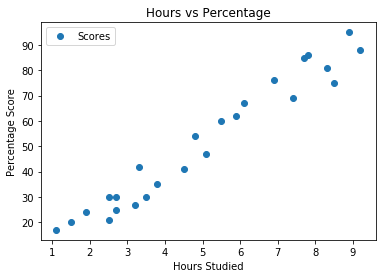

In [4]:
# Plotting the distribution of scores
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**We can say that this graph clearly shows that there is a positive linear realtion between the number of hours studied and percentage of score.**

## Preparing the data

In [5]:
# Dividing the data into attributes and labels
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:,1].values

When we have our attributes and labels, then we will split the dataset into training and test cases using Scikit-Learn's train_test_split() method.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Training the algorithm

In [7]:
# Training the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print('Training Complete')

Training Complete


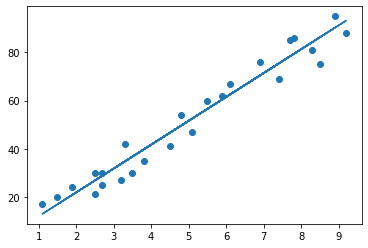

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X,Y)
plt.plot(X, line)
plt.show()

**After training our algorithm, we will now make predictions.**

## Making Predictions

In [9]:
# Testing data ( in Hours)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Predicting the scores
Y_pred = regressor.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [11]:
# Comparing Actual vs Predicted
df=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

In [12]:
# Testing with my own data
hours = np.array(9.75)
own_pred = regressor.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.75
Predicted Score = 98.64706072769648


## Evaluation of the model

Let's evaluate that how the algorithm is performing on the data set.

In [13]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error:  4.183859899002975
